In [1]:
import os
import pandas as pd
import numpy as np
import pymorphy2
import nltk
from nltk.tokenize import WhitespaceTokenizer
from string import punctuation

In [2]:
alltxt = ''         #все тексты в одной переменной

for root, dirs, files in os.walk('.'):
    for fname in files:
        point = fname.rfind('.')
        extension = fname[point + 1:]
        if extension == 'txt':
            file = open(root+'/'+fname, 'r+')
            alltxt += file.read()
            file.close()

In [3]:
def tokens(file):  # находит токены
    exclude = set(punctuation + '0123456789'+'–—'+'«»')
    file = ''.join(ch for ch in file if ch not in exclude)
    tkns = WhitespaceTokenizer().tokenize(file.lower()) 
    return tkns

In [4]:
len(tokens(alltxt)) #количество токенов во всех текстах

138075

In [5]:
def freq(file, word):
    t = tokens(file)
    k = 0
    for i in t:
        if i == word:
            k += 1
    return (k*1000000)/len(t)

#### Частота ключевых слов в НЧСРЯ
- 274 путь; путь; 357.3
- 1626 ящик; ящик; 75.4
- 692 берегу; берег; 164.7
- 1281 волны; волна; 95.4
- 12947 жемчуг; жемчуг; 5.1
- 191 вода; вода; 484.4
- мартышка; мартышка;-
- грот; грот;-

In [6]:
# В коллекции документов
words = ['путь','ящик','берегу','волны','жемчуг','вода','мартышка','грот']
for w in words:
    print(w+'; ',freq(alltxt, w))

путь;  239.00054318305268
ящик;  101.39416983523448
берегу;  94.15172913271772
волны;  94.15172913271772
жемчуг;  28.969762810066992
вода;  65.18196632265074
мартышка;  246.24298388556943
грот;  152.0912547528517


In [7]:
mintxt = open('mumi2.txt', 'r+').read()

In [8]:
# В выбранном документе
for w in words:
    print(w+'; ',freq(mintxt, w))

путь;  4896.626768226333
ящик;  1088.139281828074
берегу;  1632.208922742111
волны;  1088.139281828074
жемчуг;  1088.139281828074
вода;  1088.139281828074
мартышка;  7072.905331882481
грот;  3808.487486398259


1) Есть ли среди выбранных вами ключевых слов редкие слова?
Да, мартышка и грот

2) Есть ли среди выбранных вами слов слова, вошедшие в топ 500 по частоте?
Да, путь и вода

3) К каким частям речи относятся выбранные вами слова, слов какой части речи больше?
Существительные

4) Какие слова встретились во всех или в большинстве документов? Каковы их грамматические характеристики
если смотреть по тем словам, что я выбрала в качестве ключевых, то никаких выводов сделать нельзя. Потому что я выбрала только существительные. Потому что существительные лучше запоминаются, чем другие части речи.


In [9]:
# Задание 1.2.

data = np.array([['','mumi2','mumi', 'ak1', 'ak5', 'fl3'],
                ['путь',1,1,0,1,1],
                ['ящик',1,1,1,0,1],
                ['мартышка',1,1,0,0,0],
                ['берегу',1,1,0,0,0],
                ['жемчуг',1,1,0,1,0],
                ['грот',1,1,0,0,0],
                ['вода',1,1,1,0,1],
                ['мой',1,1,1,1,1],            # высокочастотные слова
                ['очень',1,1,1,1,1],
                ['он',1,1,1,1,1]])
                
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))

         mumi2 mumi ak1 ak5 fl3
путь         1    1   0   1   1
ящик         1    1   1   0   1
мартышка     1    1   0   0   0
берегу       1    1   0   0   0
жемчуг       1    1   0   1   0
грот         1    1   0   0   0
вода         1    1   1   0   1
мой          1    1   1   1   1
очень        1    1   1   1   1
он           1    1   1   1   1


##### Найдите тексты, удовлетворяющие запросу Word1&Word2&¬Word3
fl3

In [21]:
types_all = nltk.FreqDist(tokens(alltxt))
for i in types_all.most_common()[-2:]:  # находим 2 редких слова в коллекции
    print (i[0], i[1])

улыбнулось 1
устроят 1


In [16]:
types_min = nltk.FreqDist(tokens(mintxt))
for i in types_min.most_common():    # проверяем, встречаются ли эти слова в выбранном тексте
    if i[0] == 'улыбнулось' or i[0] == 'устроят':
        print(i[0], i[1])

In [15]:
len(tokens(mintxt))

1838

In [19]:
def pymorf(types, leks):
    morph = pymorphy2.MorphAnalyzer()
    lemmata = nltk.FreqDist()
    for t in types:
        try:
            l = morph.parse(t)[0].normal_form
            if l in lemmata:
                lemmata[l] += types[t]
            else:
                lemmata[l] = types[t]
        except IndexError:
            if t in lemmata:
                lemmata[t] += types[t]
            else:
                lemmata[t] = types[t]

    for i in lemmata.most_common():
        for l in leks:
            if l == i[0]:
                print (i[0], i[1])

In [22]:
leks_all = ['путь','ящик','волна','грот','жемчуг','вода','быть','весь','улыбнуться','устроить']
pymorf(types_all, leks_all)

быть 1793
весь 1211
путь 69
вода 57
улыбнуться 52
волна 34
устроить 29
грот 29
ящик 25
жемчуг 10


In [37]:
words4 = ['грот','жемчуг','быть','весь']
df = pd.DataFrame(columns=words4)

In [58]:
for root, dirs, files in os.walk('.'):
    for fname in files:
        point = fname.rfind('.')
        extension = fname[point + 1:]
        if extension == 'txt':
            file = open(root+'/'+fname, 'r+').read()
            print(fname)
            df.loc[fname] = 0
            for w in words4:
                f = freq(file, w)
                print(w+'; ',f)
                df[w][fname] = f
            print()

ak1.txt
грот;  0.0
жемчуг;  0.0
быть;  2117.362371445856
весь;  151.24016938898973

ak2.txt
грот;  0.0
жемчуг;  0.0
быть;  2961.082910321489
весь;  282.0078962210942

ak3.txt
грот;  0.0
жемчуг;  0.0
быть;  2879.291251384275
весь;  738.27980804725

ak4.txt
грот;  0.0
жемчуг;  0.0
быть;  1933.3456085435464
весь;  460.3203829865586

ak5.txt
грот;  0.0
жемчуг;  0.0
быть;  2001.8350154308116
весь;  417.04896154808574

fl1.txt
грот;  0.0
жемчуг;  0.0
быть;  626.0620695823271
весь;  447.1871925588051

fl2.txt
грот;  0.0
жемчуг;  0.0
быть;  742.3170188548523
весь;  395.9024100559212

fl3.txt
грот;  0.0
жемчуг;  0.0
быть;  872.8723735893759
весь;  415.6535112330361

mumi.txt
грот;  2110.022607385079
жемчуг;  301.4318010550113
быть;  1055.0113036925395
весь;  753.5795026375282

mumi2.txt
грот;  3808.487486398259
жемчуг;  1088.139281828074
быть;  1088.139281828074
весь;  544.069640914037



In [59]:
df

,грот,жемчуг,быть,весь
ak1.txt,0.000000,0.000000,2117.362371,151.240169
ak2.txt,0.000000,0.000000,2961.082910,282.007896
ak3.txt,0.000000,0.000000,2879.291251,738.279808
ak4.txt,0.000000,0.000000,1933.345609,460.320383
ak5.txt,0.000000,0.000000,2001.835015,417.048962
fl1.txt,0.000000,0.000000,626.062070,447.187193
fl2.txt,0.000000,0.000000,742.317019,395.902410
fl3.txt,0.000000,0.000000,872.872374,415.653511
mumi.txt,2110.022607,301.431801,1055.011304,753.579503
mumi2.txt,3808.487486,1088.139282,1088.139282,544.069641


In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
df = df.rename(columns={'грот': 'grot', 'жемчуг': 'zhemchug','быть': 'byt', 'весь': 'ves'})
#иначе просто квдратики,вместо названий

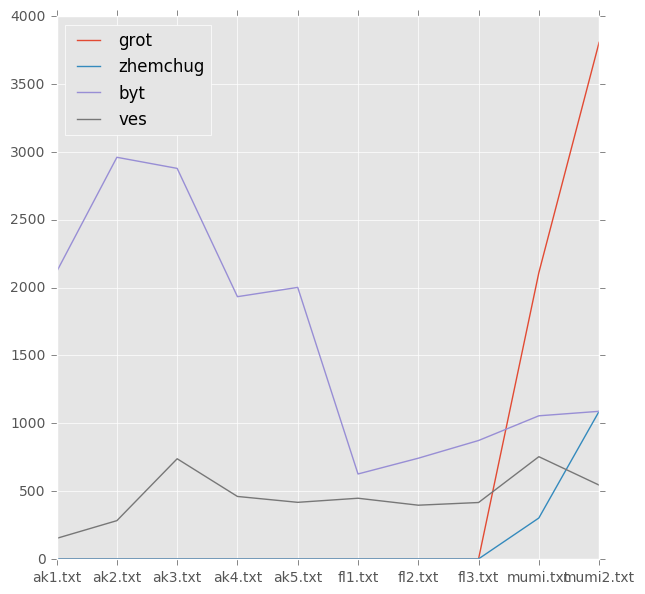

In [65]:
f = plt.figure(figsize=(7,7))
df.plot(ax=f.gca())

Отличаются. Слова с большим tf.idf имеют imp выше в выбранном тексте и похожем на него, чем слова, взятые из частотного словаря